In [1]:
import numpy as np
import pandas as pd

In [8]:
movie_df = pd.read_csv("movies.csv", usecols=['movieId', 'title'], dtype= {'movieId':'int32', 'title':'str'})
rating_df = pd.read_csv("ratings.csv", usecols=['userId','movieId','rating'], 
                        dtype= {'userId': 'int32','movieId':'int32','rating': 'float32'})

In [12]:
movie_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [13]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [16]:
df = pd.merge(rating_df, movie_df, on = 'movieId')
df

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [175]:
# Movie rating count
# How many people rated each movie. To consider only movies for which many people given ratings.

combine_movie_rating = df.dropna(axis = 0, subset= ['title']) # Drop the rows which has NA in 'title'

In [178]:
movie_rating_count = (combine_movie_rating.groupby(["title"])["rating"]
                      .count()
                      .reset_index()
                      .rename(columns = {'rating': 'totalRatingCount'}))

In [179]:
movie_rating_count.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [53]:
# Sort the movies with as many people as rated
for_hist = movie_rating_count.sort_values(by="totalRatingCount", ascending= False)
for_hist

,title,totalRatingCount
3158,Forrest Gump (1994),329
7593,"Shawshank Redemption, The (1994)",317
6865,Pulp Fiction (1994),307
7680,"Silence of the Lambs, The (1991)",279
5512,"Matrix, The (1999)",278
...,...,...
4773,King Solomon's Mines (1950),1
4772,King Solomon's Mines (1937),1
4771,King Ralph (1991),1
4769,King Kong Lives (1986),1


In [180]:
# Merge this rating table with input table
rating_with_totalRatingCount = pd.merge(df, movie_rating_count, left_on= "title", right_on = "title", how = "left")
rating_with_totalRatingCount

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),1
100832,610,160527,4.5,Sympathy for the Underdog (1971),1
100833,610,160836,3.0,Hazard (2005),1
100834,610,163937,3.5,Blair Witch (2016),1


In [181]:
movie_rating_count.describe()

,totalRatingCount
count,9719.000000
mean,10.375141
std,22.406220
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,329.000000


In [182]:
import seaborn as sns
rating_with_totalRatingCount["totalRatingCount"]

0         215
1         215
2         215
3         215
4         215
         ... 
100831      1
100832      1
100833      1
100834      1
100835      1
Name: totalRatingCount, Length: 100836, dtype: int64

C:\Users\vijay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='totalRatingCount'>

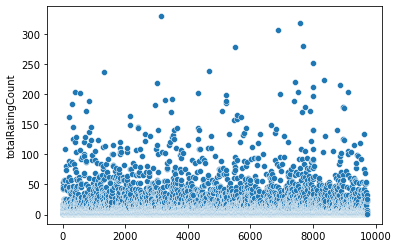

In [67]:
sns.scatterplot(movie_rating_count.index, movie_rating_count["totalRatingCount"])

In [183]:
# Select only movies for which many people given rating, ignore movies with only 1,2,3 etc people given rating.
popularity_threshold = 50
rating_popular_movie = rating_with_totalRatingCount[rating_with_totalRatingCount["totalRatingCount"] >= popularity_threshold]
rating_popular_movie

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215
...,...,...,...,...,...
79246,603,1997,4.0,"Exorcist, The (1973)",53
79247,606,1997,3.0,"Exorcist, The (1973)",53
79248,607,1997,5.0,"Exorcist, The (1973)",53
79249,608,1997,4.5,"Exorcist, The (1973)",53


In [184]:
# Create the Pivot Table with title in rows, userId in columns, rating as values
movie_feature_df = rating_popular_movie.pivot_table(values="rating",
                                                    index="title",
                                                    columns="userId").fillna(0)
movie_feature_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2: X-Men United (2003),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0
You've Got Mail (1998),0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
Young Frankenstein (1974),5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0


In [195]:
from scipy.sparse import csr_matrix

In [196]:
# Create a spare matrix to give to model as input
movie_feature_df_matrix = csr_matrix(movie_feature_df.values)
print(movie_feature_df_matrix.toarray())
movie_feature_df_matrix.toarray()[1][3]

[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 3.  0.  4.5]
 ...
 [5.  0.  0.  ... 0.  0.  0. ]
 [0.  3.  0.  ... 0.  0.  3.5]
 [0.  0.  0.  ... 3.  0.  4. ]]


5.0

In [197]:
## K nearest Neighbor model with finding distance using "cosine".

from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(metric= "cosine", algorithm = 'brute')
knn_model.fit(movie_feature_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [198]:
# Select random movie index
query_index = np.random.choice(movie_feature_df.shape[0])
query_index

60

In [199]:
# gives the all the user rating for the randomly selected movie
movie_feature_df.iloc[query_index]

userId
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
606    2.5
607    4.0
608    1.5
609    0.0
610    0.0
Name: Blair Witch Project, The (1999), Length: 606, dtype: float32

In [200]:
# Values are in 1-D array
movie_feature_df.iloc[query_index].values

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 3.5, 0. , 0. , 3.5, 0. , 4. ,
       0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. , 3.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 4.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ,
       0. , 0. , 5. , 0. , 0. , 0. , 0. , 0. , 2.5, 1. , 0. , 4. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 4.5, 0.

In [201]:
# Model accepts 2D array, so reshape
distance, indices = knn_model.kneighbors(movie_feature_df.iloc[query_index].values.reshape(1, -1), n_neighbors = 6)
print("distances: ", distance )
print("Indices", indices)

distances:  [[0.         0.5023043  0.5586182  0.56495285 0.57439446 0.5776981 ]]
Indices [[ 60 343 258 358 399 322]]


In [202]:
# Convert 2d to 1d by flatten()
distance.flatten()

array([0.        , 0.5023043 , 0.5586182 , 0.56495285, 0.57439446,
       0.5776981 ], dtype=float32)

In [203]:
for each in range(0, len(distance.flatten())):
    if each == 0:
        print("Current movie :", movie_feature_df.index[indices.flatten()-1][each])
    else:
        print("Other Recommendations :", movie_feature_df.index[indices.flatten()-1][each], "with distance", distance.flatten()[each] )

Current movie : Blade Runner (1982)
Other Recommendations : School of Rock (2003) with distance 0.5023043
Other Recommendations : Magnolia (1999) with distance 0.5586182
Other Recommendations : Sin City (2005) with distance 0.56495285
Other Recommendations : The Imitation Game (2014) with distance 0.57439446
Other Recommendations : Rain Man (1988) with distance 0.5776981
